# Future Network Constrained Linear Optimal Power Flow

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a future 3 day period.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
start = '2044-02-28 00:00:00'
end = '2044-03-01 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 1.

Choose from one of the National Grid Future Energy Scenarios.

In [4]:
# scenario = 'Leading The Way'
scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [5]:
year_baseline = 2012

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [6]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True)

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


                     Fen Farm Solar Park  Manor Farm  Nanterrow Farm  \
name                                                                   
2015-02-28 00:00:00             0.000000    0.000000        0.000000   
2015-02-28 01:00:00             0.000000    0.000000        0.000000   
2015-02-28 02:00:00             0.000000    0.000000        0.000000   
2015-02-28 03:00:00             0.000000    0.000000        0.000000   
2015-02-28 04:00:00             0.000000    0.000000        0.000000   
2015-02-28 05:00:00             0.000000    0.000000        0.000000   
2015-02-28 06:00:00             0.000000    0.000000        0.000000   
2015-02-28 07:00:00             0.000000    0.000000        0.000000   
2015-02-28 08:00:00             0.002909    0.001955        0.002411   
2015-02-28 09:00:00             0.014081    0.023098        0.030894   
2015-02-28 10:00:00             0.059224    0.069437        0.131742   
2015-02-28 11:00:00             0.118468    0.069298        0.15

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


                     Bonnington   Carsfad  Drumjohn  Earlstoun   Glenlee  \
2016-02-28 00:00:00    0.215320  0.215320  0.215320   0.215320  0.215320   
2016-02-28 01:00:00    0.214231  0.214231  0.214231   0.214231  0.214231   
2016-02-28 02:00:00    0.213142  0.213142  0.213142   0.213142  0.213142   
2016-02-28 03:00:00    0.203887  0.203887  0.203887   0.203887  0.203887   
2016-02-28 04:00:00    0.204432  0.204432  0.204432   0.204432  0.204432   
...                         ...       ...       ...        ...       ...   
2016-03-01 19:00:00    0.339721  0.339721  0.339721   0.339721  0.339721   
2016-03-01 20:00:00    0.337271  0.337271  0.337271   0.337271  0.337271   
2016-03-01 21:00:00    0.296984  0.296984  0.296984   0.296984  0.296984   
2016-03-01 22:00:00    0.298073  0.298073  0.298073   0.298073  0.298073   
2016-03-01 23:00:00    0.264591  0.264591  0.264591   0.264591  0.264591   

                      Kendoon  Stonebyres  Tongland  Auchtertyre  Black Rock  \
2016-02

ValueError: Length mismatch: Expected axis has 72 elements, new values have 48 elements

In [ ]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
       'Tidal lagoon S.W.Penisula', 'Tidal stream Deeside',
       'Tidal stream Harker', 'Tidal stream Lovedean', 'Tidal stream Melksham',
       'Tidal stream Penwortham', 'Tidal stream S.W.Penisula',
       'Wave power Beauly', 'Wave power Melksham', 'Wave power Neilston'],
      dtype='object', name='Generator') for attribute p_max_pu of Generator are not in main components dataframe generators
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


Lines need to be scaled up to accomadate for future generation, and specific analysis will be done on this in a later notebook.
Note: interconnects are links in future, so don't need to be selective here (as was required in historical simulation).

In [ ]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

In [ ]:
network.consistency_check()

Index(['16'], dtype='object', name='Line')
Index(['Tidal lagoon Harker', 'Tidal lagoon Penwortham',
       'Tidal lagoon S.W.Penisula', 'Tidal stream Deeside',
       'Tidal stream Harker', 'Tidal stream Lovedean', 'Tidal stream Melksham',
       'Tidal stream Penwortham', 'Tidal stream S.W.Penisula',
       'Wave power Beauly', 'Wave power Melksham', 'Wave power Neilston'],
      dtype='object', name='Generator')
Index(['build_year'], dtype='object', name='attribute')
They are:
attribute
build_year    int64
dtype: object
but should be:
attribute
build_year    int32
Name: dtype, dtype: object
Index(['build_year', 'min_up_time', 'min_down_time', 'up_time_before',
       'down_time_before'],
      dtype='object', name='attribute')
They are:
attribute
build_year          int64
min_up_time         int64
min_down_time       int64
up_time_before      int64
down_time_before    int64
dtype: object
but should be:
attribute
build_year          int32
min_up_time         int32
min_down_time       

## Running the optimisation

In [ ]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 1.39s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-wfhnywmx.lp
Reading time = 0.43 seconds
obj: 192178 rows, 58537 columns, 337897 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 192178 rows, 58537 columns and 337897 nonzeros
Model fingerprint: 0xe9dd1740
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-04, 1e+09]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 181816 rows and 23961 columns
Presolve time: 0.14s
Presolved: 10362 rows, 35002 columns, 65067 nonzeros

Ordering time: 0.09s

Barrier statistics:
 AA' NZ     : 2.674e+04
 Factor NZ  : 4.248e+05 (roughly 20 MB of memory)
 Factor Ops : 4.404e+07 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Resi

INFO:pypsa.linopf:Optimization successful. Objective value: 1.06e+06


('ok', 'optimal')

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [ ]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

print(network.links_t.p0)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
print(interconnector_import)

p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]
print(interconnector_export)

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

Link                 BritNed  EastWest  Moyle  Nemo     IFA    IFA2     NSL  \
snapshot                                                                      
2044-06-04 00:00:00      0.0       0.0    0.0   0.0  -544.0  1360.0  1904.0   
2044-06-04 01:00:00      0.0       0.0    0.0   0.0 -2720.0  1360.0  1904.0   
2044-06-04 02:00:00      0.0       0.0    0.0   0.0   544.0  1360.0  1904.0   
2044-06-04 03:00:00      0.0       0.0    0.0   0.0 -2720.0  1360.0  1904.0   
2044-06-04 04:00:00      0.0       0.0    0.0   0.0  2720.0  1360.0  1904.0   
...                      ...       ...    ...   ...     ...     ...     ...   
2044-06-06 19:00:00      0.0       0.0    0.0   0.0   544.0  1360.0  1904.0   
2044-06-06 20:00:00      0.0       0.0    0.0   0.0   544.0  1360.0  1904.0   
2044-06-06 21:00:00      0.0       0.0    0.0   0.0   544.0  1360.0  1904.0   
2044-06-06 22:00:00      0.0       0.0    0.0   0.0   544.0  1360.0  1904.0   
2044-06-06 23:00:00      0.0       0.0    0.0   0.0 

,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Waste,Wave power,Wind Offshore,Wind Onshore,Battery,Compressed Air,Liquid Air,Pumped Storage Hydroelectric,Interconnectors Import,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2044-06-04 00:00:00,0.0,81.170747,0.0,0.0,0.0,0.0,278.078249,0.0,11148.560001,0.0,...,0.0,3.164,14506.334043,1574.440822,1980.807966,2538.211978,1465.919817,3648.495510,5168.0,81.170747
2044-06-04 01:00:00,0.0,81.170747,0.0,0.0,0.0,0.0,255.329480,0.0,11148.560001,0.0,...,0.0,0.000,13544.355763,1106.892044,214.314018,1204.797867,747.957144,3706.927027,5984.0,81.170747
2044-06-04 02:00:00,0.0,81.170747,0.0,0.0,0.0,0.0,250.576006,0.0,11148.560001,0.0,...,0.0,0.000,13913.864229,1161.045551,0.000000,213.687013,305.992136,2927.775797,5168.0,81.170747
2044-06-04 03:00:00,0.0,81.170747,0.0,0.0,0.0,0.0,236.315582,0.0,11148.560001,0.0,...,0.0,0.000,12575.889275,1615.229906,840.884730,1015.092847,781.013574,3431.744014,5984.0,81.170747
2044-06-04 04:00:00,0.0,81.170747,0.0,0.0,0.0,0.0,229.864439,0.0,11148.560001,0.0,...,0.0,3.164,10152.310753,1918.322831,3386.645306,1864.453793,0.000000,4452.304035,5984.0,81.170747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044-06-06 19:00:00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,28.320,44534.130989,2520.646643,954.814867,0.000000,0.000000,0.000000,5168.0,0.000000
2044-06-06 20:00:00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,28.320,45351.318466,4468.244166,0.000000,0.000000,0.000000,1092.972973,5168.0,0.000000
2044-06-06 21:00:00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,28.320,30437.344589,4229.757191,8707.970711,2182.887563,1012.570128,1011.800629,5168.0,0.000000


Graph the power output of the different generation types...

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


Text(0.5, 0, '')

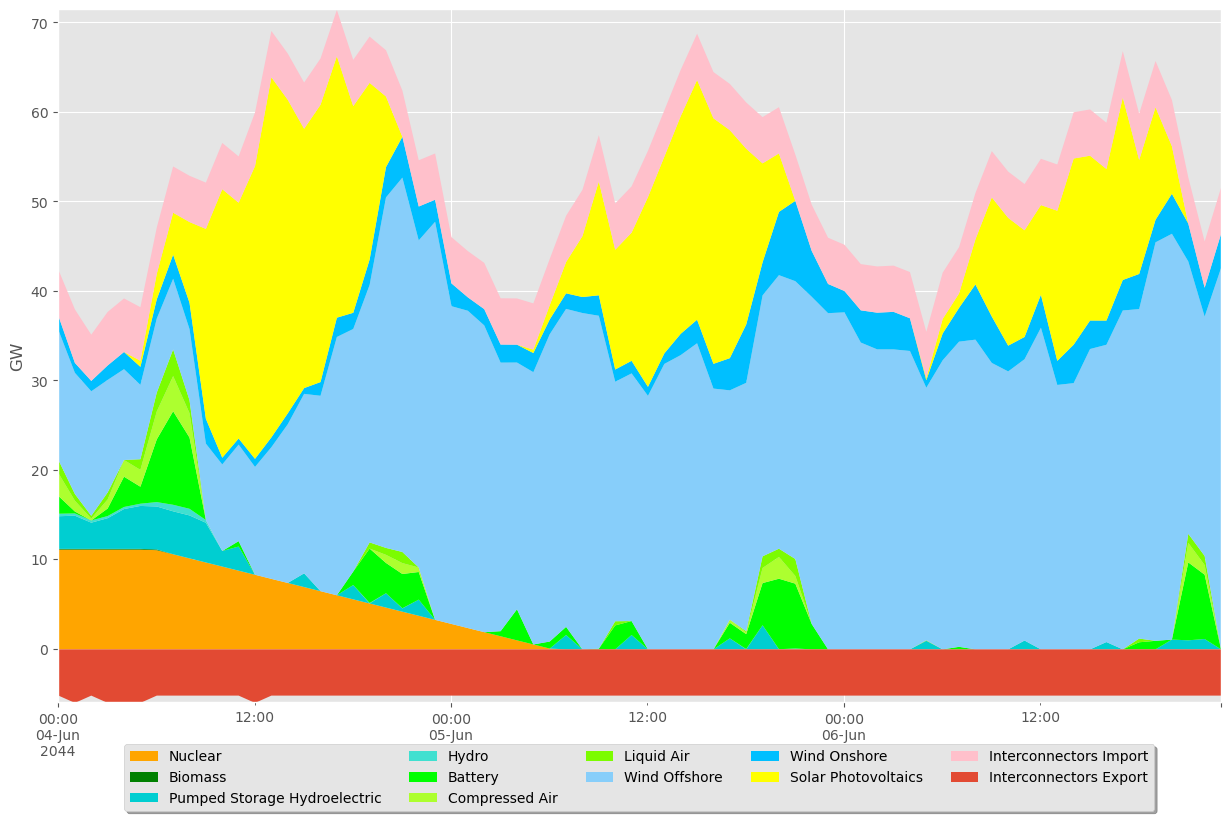

In [ ]:
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

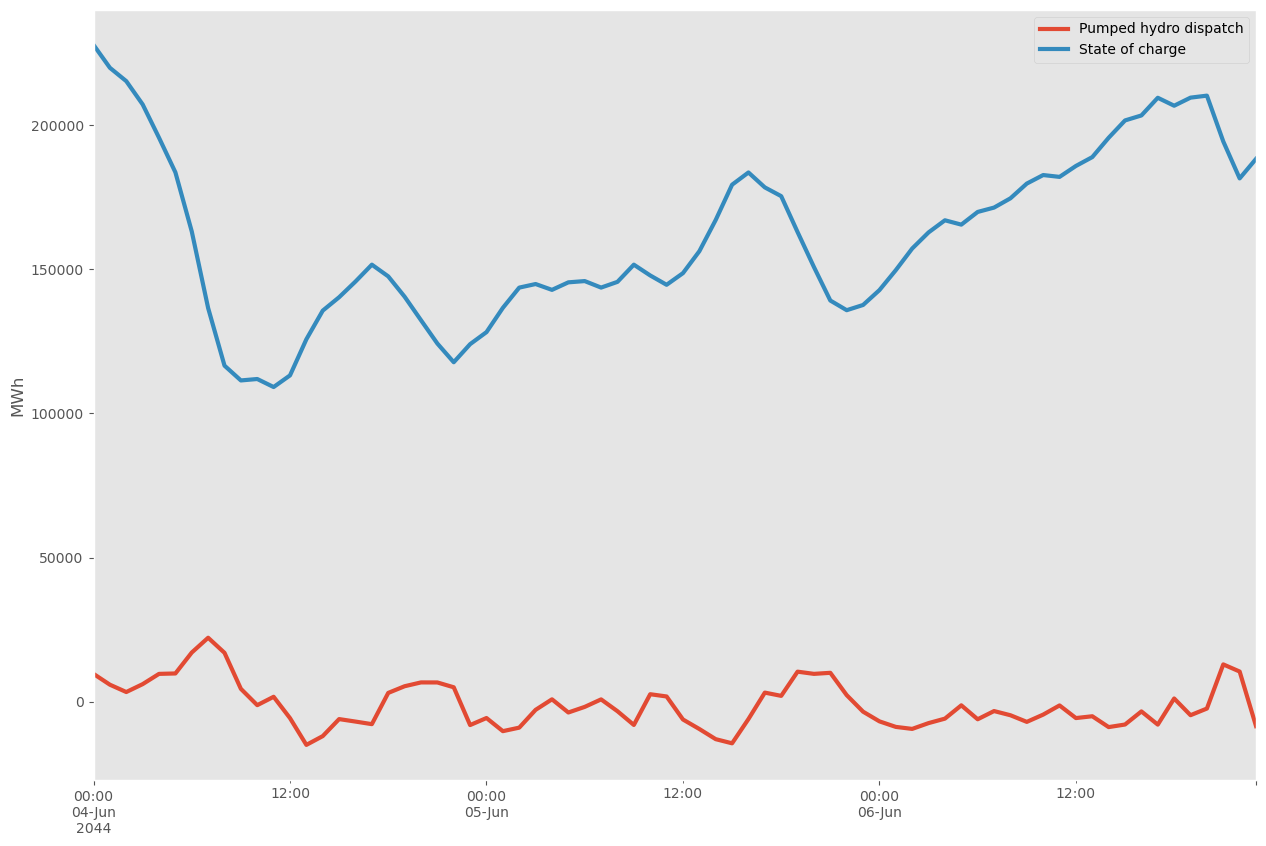

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting line loading

Look at the line loading stats and graph...

In [ ]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean     -0.525272
std       0.832014
min      -4.000000
25%      -0.753550
50%      -0.442750
75%      -0.160178
max       1.737314
dtype: float64

(<matplotlib.collections.PatchCollection at 0x29c1011ef40>,
 <matplotlib.collections.LineCollection at 0x29c1249c220>)

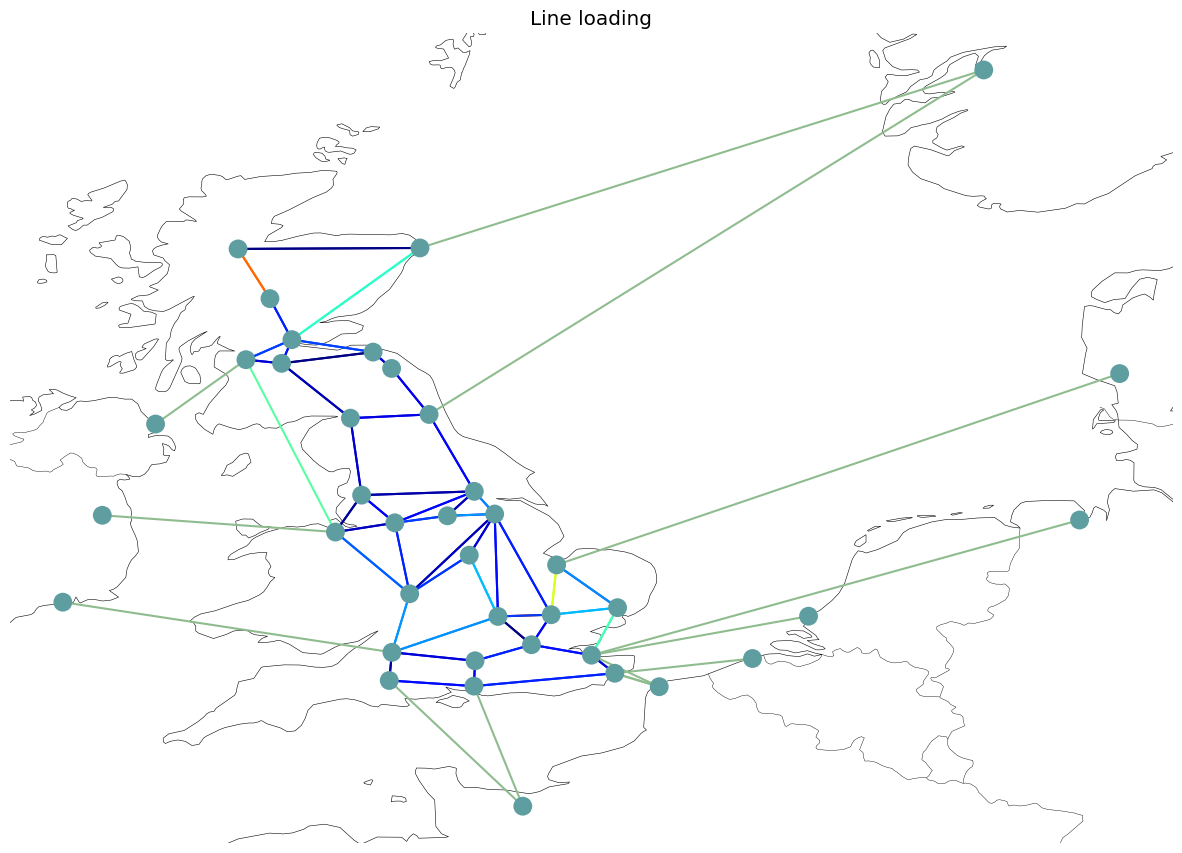

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

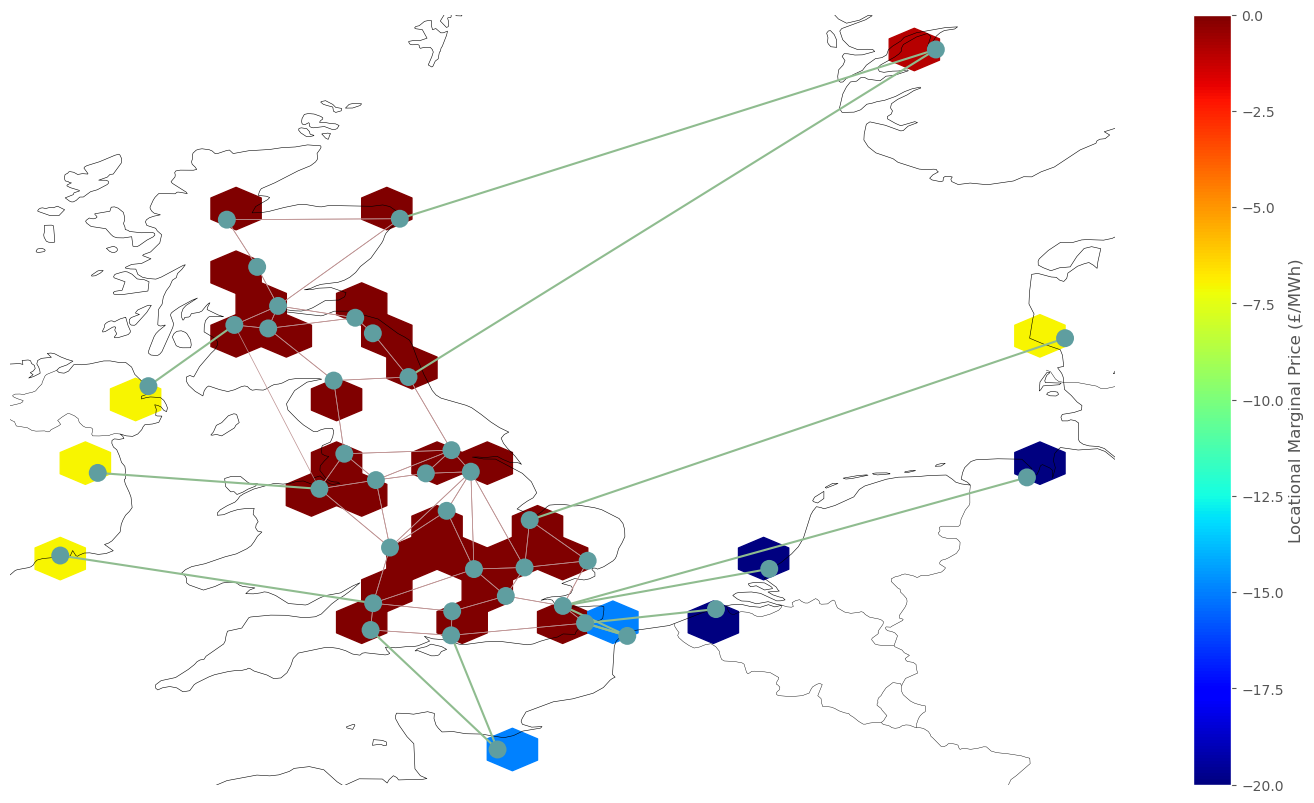

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [ ]:
network.buses_t.marginal_price

Bus,Beauly,Peterhead,Errochty,Denny/Bonnybridge,Neilston,Strathaven,Torness,Eccles,Harker,Stella West,...,Netherlands,Belgium,France1,France2,Ireland,N. Ireland,Denmark,Norway,Ireland2,Germany
snapshot,,,,,,,,,,,,,,,,,,,,,
2044-06-04 00:00:00,-12.820438,0.000000,67.948904,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,...,21.666667,21.666667,26.666667,26.666667,34.666667,34.666667,34.666667,40.666667,34.666667,21.666667
2044-06-04 01:00:00,-12.820438,0.000000,67.948904,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,...,21.666667,21.666667,26.666667,26.666667,34.666667,34.666667,34.666667,40.666667,34.666667,21.666667
2044-06-04 02:00:00,-12.820438,0.000000,67.948904,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,...,21.666667,21.666667,26.666667,26.666667,34.666667,34.666667,34.666667,40.666667,34.666667,21.666667
2044-06-04 03:00:00,-12.820438,0.000000,67.948904,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,...,21.666667,21.666667,26.666667,26.666667,34.666667,34.666667,34.666667,40.666667,34.666667,21.666667
2044-06-04 04:00:00,0.000000,9.803878,61.764876,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,41.666667,...,21.666667,21.666667,26.666667,26.666667,34.666667,34.666667,34.666667,40.666667,34.666667,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044-06-06 19:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-20.000000,-20.000000,-15.000000,-15.000000,-7.000000,-7.000000,-7.000000,-1.000000,-7.000000,-20.000000
2044-06-06 20:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-20.000000,-20.000000,-15.000000,-15.000000,-7.000000,-7.000000,-7.000000,-1.000000,-7.000000,-20.000000
2044-06-06 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-20.000000,-20.000000,-15.000000,-15.000000,-7.000000,-7.000000,-7.000000,-1.000000,-7.000000,-20.000000


## Plotting curtailment

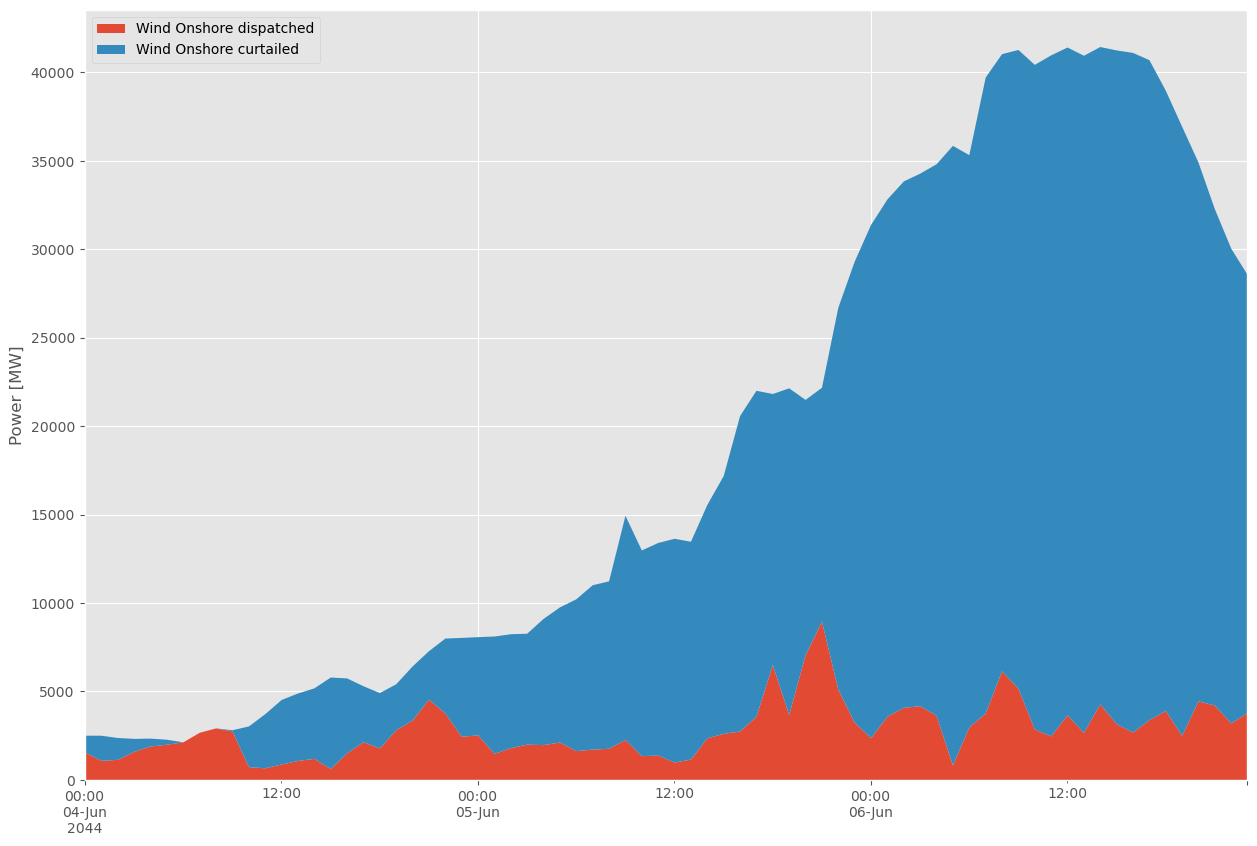

In [ ]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()